In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data2 = pd.read_csv('data/GDPlist.csv',encoding = "ISO-8859-1")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [3]:
data2

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [6]:
data2.groupby('Continent')['Country'].count()

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64

In [7]:
data2.groupby('Continent')['GDP (millions of US$)'].sum()

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP (millions of US$), dtype: int64

In [11]:
dat2 = data2.sort_values(by='GDP (millions of US$)',ascending=False)
dat2.head(10)

,Country,Continent,GDP (millions of US$)
118,United States,North America,15094025
23,China,Asia,7298147
60,Japan,Asia,5869471
44,Germany,Europe,3577031
41,France,Europe,2776324
15,Brazil,South America,2492908
117,United Kingdom,Europe,2417570
58,Italy,Europe,2198730
93,Russia,Asia,1850401
21,Canada,North America,1736869


In [5]:
data2['Country'].unique()

array(['\xa0Afghanistan', '\xa0Albania', '\xa0Algeria', '\xa0Angola',
       '\xa0Argentina', '\xa0Australia', '\xa0Austria', '\xa0Azerbaijan',
       '\xa0Bahrain', '\xa0Bangladesh', '\xa0Belarus', '\xa0Belgium',
       '\xa0Bolivia', '\xa0Bosnia and Herzegovina', '\xa0Botswana',
       '\xa0Brazil', '\xa0Brunei', '\xa0Bulgaria', '\xa0Burma',
       '\xa0Cambodia', '\xa0Cameroon', '\xa0Canada', '\xa0Chile',
       '\xa0China', '\xa0Colombia',
       '\xa0Congo, Democratic Republic of the',
       '\xa0Congo, Republic of the', '\xa0Costa Rica',
       "\xa0Côte d'Ivoire", '\xa0Croatia', '\xa0Cyprus',
       '\xa0Czech Republic', '\xa0Denmark', '\xa0Dominican Republic',
       '\xa0Ecuador', '\xa0Egypt', '\xa0El Salvador',
       '\xa0Equatorial Guinea', '\xa0Estonia', '\xa0Ethiopia',
       '\xa0Finland', '\xa0France', '\xa0Gabon', '\xa0Georgia',
       '\xa0Germany', '\xa0Ghana', '\xa0Greece', '\xa0Guatemala',
       '\xa0Honduras', '\xa0Hong Kong', '\xa0Hungary', '\xa0Iceland',
     

In [6]:
data2['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [ ]:
1. H0: Trung binh GDP cua cac quoc gia tren the gioi la 500 ty usd/nam

In [10]:
stats.ttest_1samp(data2['GDP (millions of US$)'],popmean=500000)

Ttest_1sampResult(statistic=0.3757438669518338, pvalue=0.7077493494055246)

In [ ]:
pvalue = 71% => H0 tương đối chính xác với xác suất chính xác tối thiểu là 70%

In [ ]:
1. H0: GDP trung binh o cac quoc gia Chau Au cao hon Chau A

In [15]:
euro = data2.query("Continent=='Europe'")['GDP (millions of US$)']
asia = data2.query("Continent=='Asia'")['GDP (millions of US$)']

In [16]:
tstatic, pvalue = stats.ttest_ind(euro,asia,alternative = 'greater')
print(tstatic, pvalue)

-0.5586877419842816 0.7109336599036772


In [17]:
tstatic, pvalue = stats.ttest_ind(euro,asia,alternative = 'two-sided')
print(tstatic, pvalue)

-0.5586877419842816 0.5781326801926456


<AxesSubplot: xlabel='GDP (millions of US$)', ylabel='Density'>

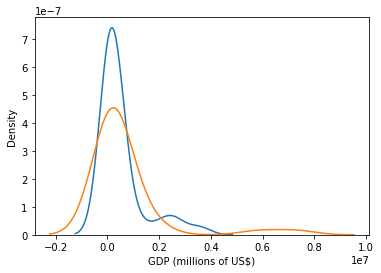

In [18]:
sns.kdeplot(euro)
sns.kdeplot(asia)

In [ ]:
pvalue = 71% => H0 tương đối chính xác với xác suất chính xác tối thiểu là 71%

In [19]:
a = ['South America', 'North America']
america = data2.query("Continent in @a")['GDP (millions of US$)']

<AxesSubplot: xlabel='GDP (millions of US$)', ylabel='Density'>

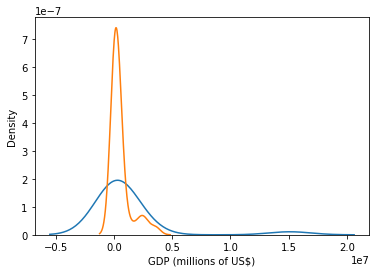

In [21]:
sns.kdeplot(america)
sns.kdeplot(euro)

In [24]:
stats.ttest_ind(euro,america)

Ttest_indResult(statistic=-1.0372877375171978, pvalue=0.30414081636906126)